In [1]:
import requests
import pandas as pd

# Step 1: Search for the Ngram and get IDs
def search_ngram(query, corpus='eng', flags='cs'):
    url = f"https://api.ngrams.dev/{corpus}/search"
    params = {
        'query': query,
        'flags': flags
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        raise Exception(f"Error fetching data: {response.status_code} - {response.text}")
    
    data = response.json()
    ngram_ids = [ngram['id'] for ngram in data.get('ngrams', [])]
    return ngram_ids

# Step 2: Fetch year-based match counts using the ID
def fetch_ngram_by_id(ngram_id, corpus='eng'):
    url = f"https://api.ngrams.dev/{corpus}/{ngram_id}"
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Error fetching ngram details: {response.status_code} - {response.text}")
    
    return response.json()

# Aggregating the data
def aggregate_ngram_data(ngram_ids, corpus):
    all_data = pd.DataFrame()
    for ngram_id in ngram_ids:
        details = fetch_ngram_by_id(ngram_id, corpus)
        if 'stats' in details:
            df = pd.DataFrame(details['stats'])
            df['year'] = df['year'].astype(int)
            df.set_index('year', inplace=True)
            all_data = all_data.add(df, fill_value=0) if not all_data.empty else df
    return all_data

try:
    # Step 1: Search for the term and get its ngram IDs
    german_ids = search_ngram("Internet", 'ger', 'cs')
    english_ids = search_ngram("Internet", 'eng', 'cs')
    russian_ids = search_ngram("Интернет", 'rus', 'cs')

    # Step 2: Fetch the year-based match counts and aggregate
    german_data = aggregate_ngram_data(german_ids, 'ger')
    english_data = aggregate_ngram_data(english_ids, 'eng')
    russian_data = aggregate_ngram_data(russian_ids, 'rus')

    # Filter for years after 1950
    german_data = german_data[german_data.index >= 1950]
    english_data = english_data[english_data.index >= 1950]
    russian_data = russian_data[russian_data.index >= 1950]

    print(german_data)
    print(english_data)
    print(russian_data)

except Exception as e:
    print(e)


      absMatchCount  relMatchCount
year                              
1950            169   2.312171e-07
1951             43   6.627794e-08
1952            209   2.872567e-07
1953            114   1.423307e-07
1954            169   1.881693e-07
...             ...            ...
2015         365067   5.797065e-05
2016         326244   5.377076e-05
2017         320866   4.822970e-05
2018         324755   5.551796e-05
2019         278382   5.431098e-05

[70 rows x 2 columns]
      absMatchCount  relMatchCount
year                              
1950           1159   1.343267e-07
1951            678   8.115660e-08
1952            248   2.952270e-08
1953            780   9.238306e-08
1954           1456   1.686684e-07
...             ...            ...
2015        1111112   4.153226e-05
2016        1161083   4.349087e-05
2017         932851   3.392802e-05
2018         746010   2.835935e-05
2019         695386   3.046444e-05

[70 rows x 2 columns]
      absMatchCount  relMatchCount
year     

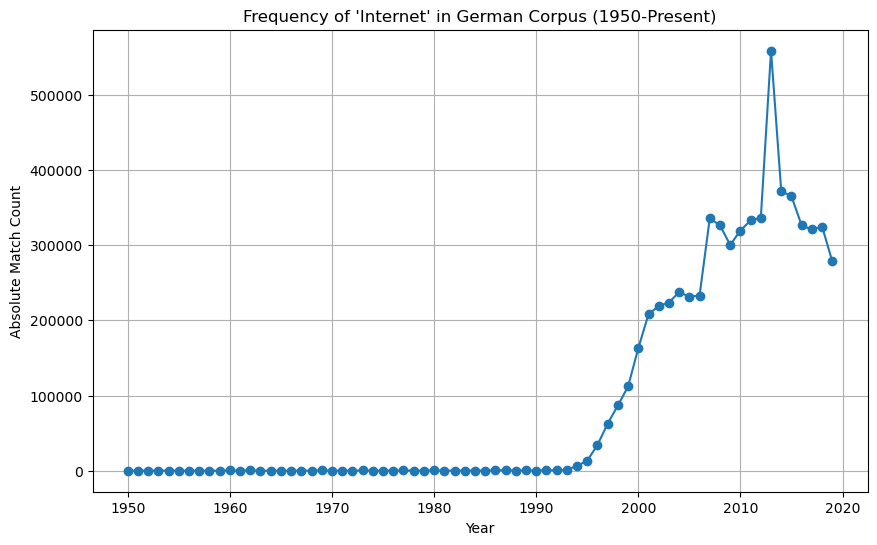

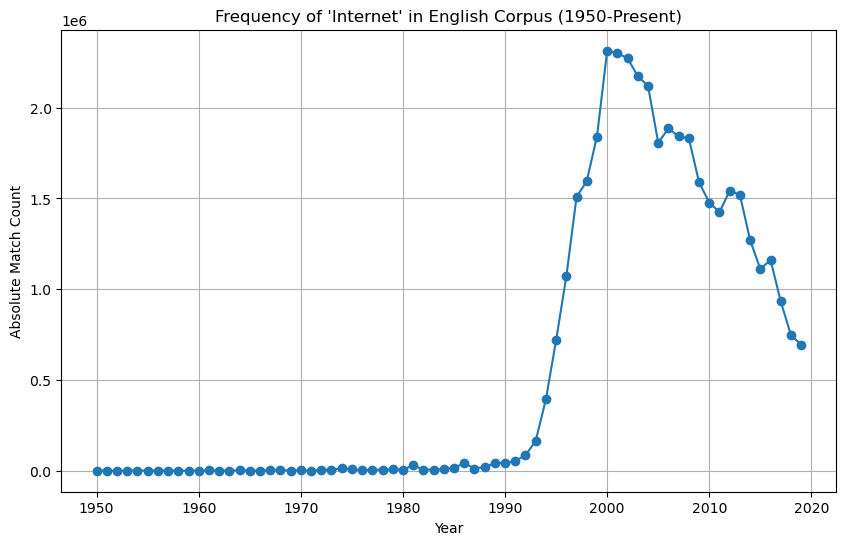

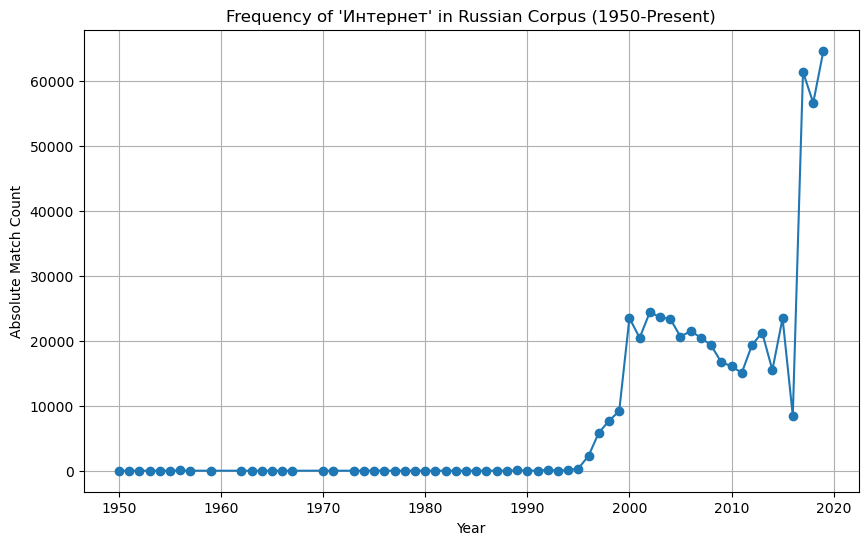

In [2]:
import matplotlib.pyplot as plt

def plot_ngram_frequency(data, title):
    if not data.empty:
        plt.figure(figsize=(10, 6)) 
        data['absMatchCount'].plot(kind='line', marker='o')
        plt.title(title)
        plt.xlabel('Year')
        plt.ylabel('Absolute Match Count')
        plt.grid(True)
        plt.show() 
    else:
        print(f"No data to plot for: {title}")

try:
    german_ids = search_ngram("Internet", 'ger', 'cs')
    english_ids = search_ngram("Internet", 'eng', 'cs')
    russian_ids = search_ngram("Интернет", 'rus', 'cs')

    german_data = aggregate_ngram_data(german_ids, 'ger')
    english_data = aggregate_ngram_data(english_ids, 'eng')
    russian_data = aggregate_ngram_data(russian_ids, 'rus')

    german_data = german_data[german_data.index >= 1950]
    english_data = english_data[english_data.index >= 1950]
    russian_data = russian_data[russian_data.index >= 1950]

    plot_ngram_frequency(german_data, "Frequency of 'Internet' in German Corpus (1950-Present)")
    plot_ngram_frequency(english_data, "Frequency of 'Internet' in English Corpus (1950-Present)")
    plot_ngram_frequency(russian_data, "Frequency of 'Интернет' in Russian Corpus (1950-Present)")

except Exception as e:
    print(e)


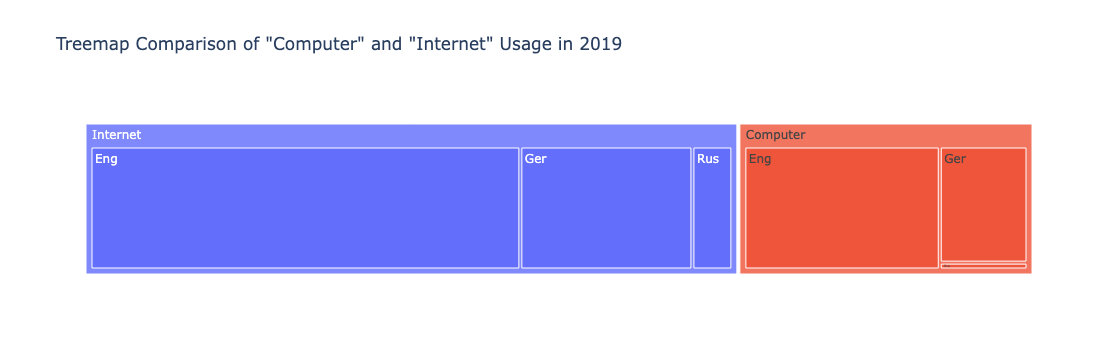

In [36]:
import requests
import pandas as pd
import plotly.express as px

def search_ngram(query, corpus='eng', flags='cs'):
    url = f"https://api.ngrams.dev/{corpus}/search"
    params = {
        'query': query,
        'flags': flags
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        raise Exception(f"Error fetching data: {response.status_code} - {response.text}")
    data = response.json()
    ngram_ids = [ngram['id'] for ngram in data.get('ngrams', [])]
    return ngram_ids

def fetch_ngram_by_id(ngram_id, corpus='eng'):
    url = f"https://api.ngrams.dev/{corpus}/{ngram_id}"
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Error fetching ngram details: {response.status_code} - {response.text}")
    return response.json()

def aggregate_ngram_data(ngram_ids, corpus):
    all_data = pd.DataFrame()
    for ngram_id in ngram_ids:
        details = fetch_ngram_by_id(ngram_id, corpus)
        if 'stats' in details:
            df = pd.DataFrame(details['stats'])
            df['year'] = df['year'].astype(int)
            df.set_index('year', inplace=True)
            all_data = all_data.add(df, fill_value=0) if not all_data.empty else df
    return all_data

try:
    terms = {'Computer': ['Computer', 'Computer', 'Компьютер'], 'Internet': ['Internet', 'Internet', 'Интернет']}
    corpora = ['eng', 'ger', 'rus']
    
    data_dict = {}
    
    for term, queries in terms.items():
        for lang, corpus in zip(queries, corpora):
            ids = search_ngram(lang, corpus)
            data = aggregate_ngram_data(ids, corpus)
            data = data[data.index >= 1950]  
            data_dict[f"{term}_{corpus}"] = data

    year = 2019

    combined_data = {
        'Term': [],
        'Language': [],
        'Usage': []
    }
    
    for term, queries in terms.items():
        for corpus, lang in zip(corpora, queries):
            data_key = f"{term}_{corpus}"
            if year in data_dict[data_key].index:
                combined_data['Term'].append(term)
                combined_data['Language'].append(corpus.capitalize())
                combined_data['Usage'].append(data_dict[data_key].loc[year, 'absMatchCount'])

    df_combined = pd.DataFrame(combined_data)

    fig = px.treemap(df_combined, path=['Term', 'Language'], values='Usage',
                     title=f'Treemap Comparison of "Computer" and "Internet" Usage in {year}')
    fig.show()
    
except Exception as e:
    print(e)

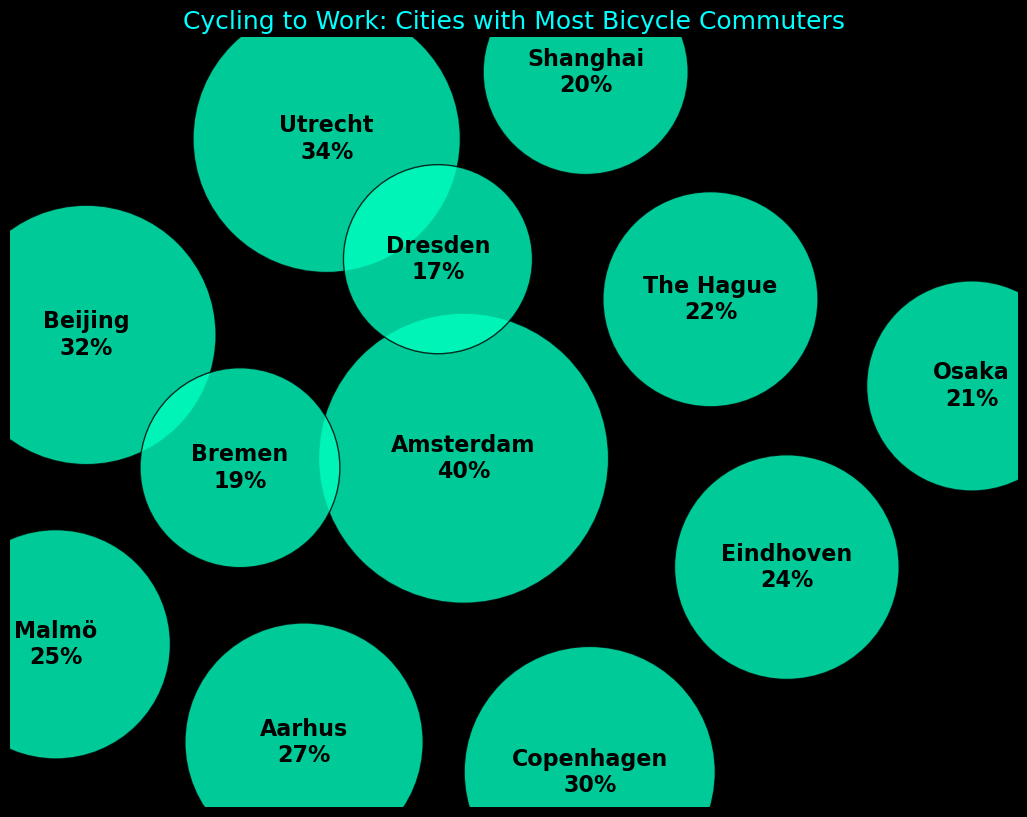

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

cities = ['Amsterdam', 'Utrecht', 'Beijing', 'Copenhagen', 'Aarhus', 'Malmö', 'Eindhoven', 'The Hague', 'Osaka', 'Shanghai', 'Bremen', 'Dresden']
cycling = [40, 34, 32, 30, 27, 25, 24, 22, 21, 20, 19, 17]

sizes = [value * 1090 for value in cycling]

x_positions = np.random.rand(len(cities)) * 5
y_positions = np.random.rand(len(cities)) * 5

def adjust_positions(x_positions, y_positions, sizes):
    for i in range(len(x_positions)):
        for j in range(i+1, len(x_positions)):
            dist = np.sqrt((x_positions[i] - x_positions[j])**2 + (y_positions[i] - y_positions[j])**2)
            min_dist = np.sqrt(sizes[i]/np.pi) + np.sqrt(sizes[j]/np.pi)

            if dist < min_dist:
                angle = np.arctan2(y_positions[j] - y_positions[i], x_positions[j] - x_positions[i])
                overlap = min_dist - dist
                x_positions[j] += np.cos(angle) * overlap
                y_positions[j] += np.sin(angle) * overlap

    return x_positions, y_positions

for _ in range(100): 
    x_positions, y_positions = adjust_positions(x_positions, y_positions, sizes)

plt.figure(figsize=(13, 10))
plt.style.use('dark_background')

plt.scatter(x_positions, y_positions, s=sizes, alpha=0.8, color='#00FFBF', edgecolor='black')

for i, city in enumerate(cities):
    plt.text(x_positions[i], y_positions[i], f'{city}\n{cycling[i]}%', ha='center', va='center', fontsize=16, color='black', weight='bold')

plt.title('Cycling to Work: Cities with Most Bicycle Commuters', fontsize=18, color='#00FFFF')
plt.axis('off')  
plt.show()

In [52]:
from PIL import Image, ImageEnhance

old_map_path = './edo_map.jpg'
old_map = Image.open(old_map_path)

old_map = old_map.convert('RGB')

modern_map_path = './modern_map.jpg' 
modern_map = Image.open(modern_map_path)

modern_map = modern_map.convert('RGB')

resize_factor = 3.4  
new_size = (int(modern_map.width * resize_factor), int(modern_map.height * resize_factor))
modern_map_resized = modern_map.resize(new_size, Image.Resampling.LANCZOS)

blended_map = old_map.copy()

position = (400, 1200) 
blended_map.paste(modern_map_resized, position)

blended_map = Image.blend(old_map, blended_map, alpha=0.35)  
blended_map.show()

In [ ]:
pip install pywaffle

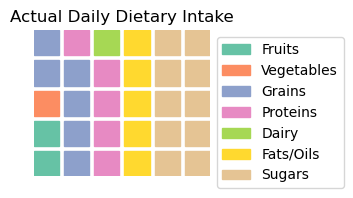

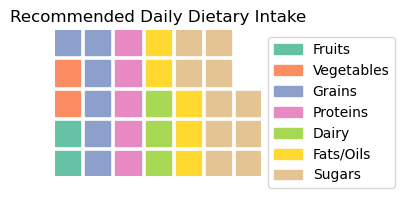

In [1]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

actual_intake = {
    'Fruits': 2,       
    'Vegetables': 1,
    'Grains': 6,
    'Proteins': 5,
    'Dairy': 1,
    'Fats/Oils': 5,
    'Sugars': 10
}

# Recommended daily intake based on USDA guidelines
recommended_intake = {
    'Fruits': 2,        # cups per day
    'Vegetables': 2.5,  # cups per day
    'Grains': 6,        # ounce-equivalents per day
    'Proteins': 5,      # ounce-equivalents per day
    'Dairy': 3,         # cups per day
    'Fats/Oils': 5,     # teaspoons per day
    'Sugars': 10        # teaspoons per day (less than 10% of total calories)
}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,  
    values=actual_intake,
    title={'label': 'Actual Daily Dietary Intake', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},  
    figsize=(5, 2)
)

plt.show()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,  
    values=recommended_intake,
    title={'label': 'Recommended Daily Dietary Intake', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
    figsize=(5, 2)
)

plt.show()

In [3]:
import pandas as pd

vulnerability_df = pd.read_csv('./nd_gain_country_index_2023/resources/vulnerability/vulnerability.csv')
readiness_df = pd.read_csv('./nd_gain_country_index_2023/resources/readiness/readiness.csv')

merged_df = pd.merge(vulnerability_df, readiness_df, on='Name')

In [4]:
print(merged_df.isnull().sum())

ISO3_x    0
Name      0
1995_x    7
1996_x    7
1997_x    7
1998_x    7
1999_x    7
2000_x    7
2001_x    7
2002_x    7
2003_x    7
2004_x    7
2005_x    7
2006_x    7
2007_x    7
2008_x    7
2009_x    7
2010_x    7
2011_x    7
2012_x    7
2013_x    7
2014_x    7
2015_x    7
2016_x    7
2017_x    7
2018_x    7
2019_x    7
2020_x    7
2021_x    7
ISO3_y    0
1995_y    0
1996_y    0
1997_y    0
1998_y    0
1999_y    0
2000_y    0
2001_y    0
2002_y    0
2003_y    0
2004_y    0
2005_y    0
2006_y    0
2007_y    0
2008_y    0
2009_y    0
2010_y    0
2011_y    0
2012_y    0
2013_y    0
2014_y    0
2015_y    0
2016_y    0
2017_y    0
2018_y    0
2019_y    0
2020_y    0
2021_y    0
dtype: int64


In [6]:
merged_df = merged_df.dropna()

In [9]:
merged_df

,ISO3_x,Name,1995_x,1996_x,1997_x,1998_x,1999_x,2000_x,2001_x,2002_x,...,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y
0,AFG,Afghanistan,0.618423,0.618587,0.618725,0.616578,0.614740,0.612856,0.610598,0.608254,...,0.227236,0.228999,0.245497,0.244925,0.255801,0.246288,0.240848,0.248755,0.237433,0.246442
1,ALB,Albania,0.433598,0.434323,0.432292,0.435615,0.446052,0.445979,0.446890,0.443617,...,0.377449,0.390161,0.413644,0.419745,0.413796,0.414696,0.416755,0.409915,0.408107,0.410559
2,DZA,Algeria,0.400165,0.399376,0.397771,0.394422,0.391496,0.389852,0.392165,0.395335,...,0.274972,0.287841,0.285217,0.291092,0.300703,0.323559,0.324853,0.325896,0.328453,0.333345
4,AGO,Angola,0.496113,0.496474,0.496332,0.496199,0.496280,0.496494,0.498913,0.497092,...,0.200360,0.209144,0.216234,0.212649,0.240550,0.243469,0.255121,0.257971,0.262799,0.268118
5,ATG,Antigua and Barbuda,0.487578,0.487168,0.486120,0.485952,0.486855,0.486503,0.485260,0.483565,...,0.488905,0.482664,0.457081,0.465654,0.458648,0.440077,0.452767,0.454456,0.452972,0.449260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VEN,"Venezuela, Bolivarian Republic o",0.387525,0.388136,0.385800,0.385653,0.385003,0.383654,0.382806,0.383058,...,0.222470,0.219894,0.209536,0.204662,0.214621,0.206034,0.193464,0.194121,0.187234,0.187419
188,VNM,Viet Nam,0.502600,0.501805,0.501583,0.501273,0.499976,0.492031,0.491146,0.491421,...,0.354904,0.364085,0.373134,0.378949,0.399803,0.402205,0.407136,0.414876,0.424139,0.425831
189,YEM,Yemen,0.556300,0.555135,0.553159,0.550583,0.549237,0.547774,0.546421,0.543580,...,0.299291,0.280939,0.277789,0.267710,0.257399,0.252663,0.246432,0.246044,0.245252,0.243635
190,ZMB,Zambia,0.483882,0.484350,0.483050,0.485892,0.485203,0.486039,0.487723,0.494292,...,0.317793,0.318158,0.329996,0.319428,0.334286,0.333006,0.333577,0.325200,0.318269,0.323668


In [ ]:
recent_year = '2021' 
merged_df_recent = merged_df[['ISO3_x', 'Name', f'{recent_year}_x', f'{recent_year}_y']]
merged_df_recent.rename(columns={f'{recent_year}_x': 'Vulnerability_Score', 
                                  f'{recent_year}_y': 'Readiness_Score'}, inplace=True)

In [15]:
merged_df_recent

,ISO3_x,Name,Vulnerability_Score,Readiness_Score
0,AFG,Afghanistan,0.590488,0.246442
1,ALB,Albania,0.395390,0.410559
2,DZA,Algeria,0.376271,0.333345
4,AGO,Angola,0.509924,0.268118
5,ATG,Antigua and Barbuda,0.467364,0.449260
...,...,...,...,...
187,VEN,"Venezuela, Bolivarian Republic o",0.383007,0.187419
188,VNM,Viet Nam,0.475313,0.425831
189,YEM,Yemen,0.543665,0.243635
190,ZMB,Zambia,0.479919,0.323668


In [17]:
merged_df_recent = merged_df_recent.reset_index(drop=True)

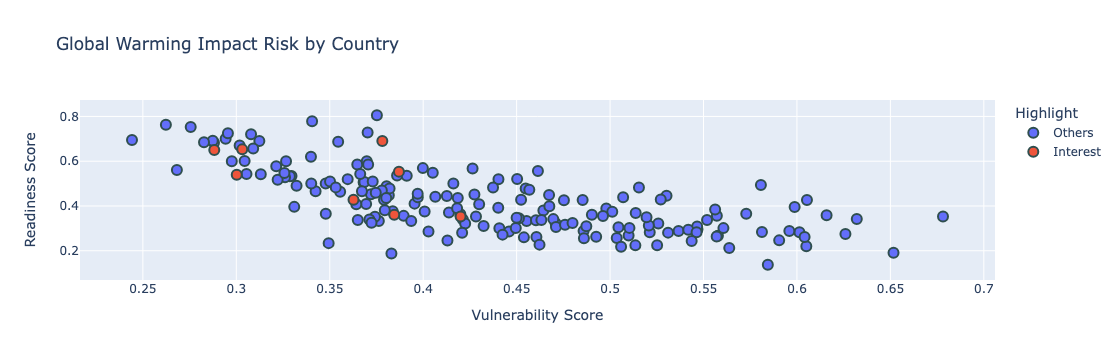

In [29]:
import plotly.express as px

countries_of_interest = ['Japan', 'Canada', 'France', 'Mexico', 'China', 'Ukraine', 'Spain', 'Egypt'] 
merged_df_recent['Highlight'] = merged_df_recent['Name'].apply(lambda x: 'Interest' if x in countries_of_interest else 'Others')

fig = px.scatter(
    merged_df_recent,
    x='Vulnerability_Score',
    y='Readiness_Score',
    color='Highlight',  
    hover_name='Name', 
    size_max=10,
    title='Global Warming Impact Risk by Country - 2021'
)

fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(
    title='Global Warming Impact Risk by Country',
    xaxis_title='Vulnerability Score',
    yaxis_title='Readiness Score'
)

fig.show()